<h1> Assignment 1</h1>
<ul>
<p>General Info:</p>
<ul>
    <li>**Hand-In Date**: 2nd October 2020</li>
    <li>**Hand-In Format**: as jupyter notebook (with all the cells executed!). The naming format shold be your studentId_Assignment1.filetype (pdf or ipynb).</li>
    <li>**Late Hand-In Penalty**: -10% of your points per late-day</li>  
    </ul>
<h2>Topics Covered: </h2>
<ul>
This lab covers the topics presented in the first three lecture groups, Introduction, Mathematical foundations and Classical optimization methods.<br />
Students attempting this lab should understand the mechanisms at work behind most classical solvers, have a decent understanding of problem spaces and start to get in touch with the Python 3.X framework and the Jupyter Notebook format. <br />
    This lab does require some minor programming proficiency in Python and some basic lin.alg understanding. You should understand functions, code modularity, be able to work with numpy or scipy and for the bonus points matplotlib or any other plotting libary. You should know how to approximate derivatives, what a hessian matrix is and what problems matrix inversion can raise. <br />

This lab specifically covers, in increasing difficulty: <br /> 
<ul>
    <li> Random Search (Task1)
    <li> Gradient Descend/First Order Methods (Task2)
    <li> Newtonian/Second Order Methods (Task3) 
</ul>
Each Task is performed on the same set of toy-problems outlined in Task0.
</ul>

<h3> Disclaimer! </h3>
The purpose of this assignment is also to motivate the topics covered in this course. Not all methods will be able to find all minima without some smart problem solving!!!

<h2>Marking Table: </h2>
<ul>
    There is a total of 99 points in this assignment. <br/>
    It is split in 3, equally weighted sections (Task 1-3). <br />
    Each of those sections contains: <br /><ul>
        <li> **Q1, 10 points** for explaining how the respective method works, analyzing what potential issues can arise when choosing to use this technique, and what advantages this technique can offer. To come about those points, please carefully consider how the technique would perform on the toy-problems in Task 0. Please be CONCISE with your explanation :-) <br />
        <li> **Q2, 10 points** for implementing the method in code. Points are awarded for code functionality AND readability. The code should be understandable on it's own. Please consider using a reasonable naming convention, code formatting and comments :-) <br/>
        <li> **Q3, 13 points** for testing the method on the toy-problems from Task 0. 2 Points per toy-problem the code was executed on. 5 for analyzing the respective method's behavior, comparing to what was expected and commenting on any findings. <br/>
        <li> **Additional 3 points** for plotting USEFUL convergence curves for each problem. This should encourage you to use helpful tools for debugging and analysis. THIS IS NOT STRICTLY REQUIRED TO REACH FULL MARKS! But I assume a reasonable a posteriori analysis to be based on some interpretable data... <br/>
    </ul>
In summary you can reach 33 points without programming. <br/>
Expect Task 1 to be easier than Task 2, which is again easier than Task 3. Plan your time accordingly!
    </ul>
    
<h2>Python Help: </h2>
<ul>
This lab requires a plotting library and numpy, as well as a working jupyter notebook and Python 3.X base (obviously). To install both modules, use the pip (or pip3) command. <br />
    A generally helpful site for ALL programming questions is stackoverflow. Any questions not specifically answered in this document are likely too specific (OR your TA did not think of them) and should probably be looked up there first. In general, Google is the software engineer's multi-tool and you should all be proficient at using it as such. <br/>
    Afterwards, if the question still persists: <br/>
    Either email your TA and wait for an answer (it can take some time since the TA will be basically redoing the same steps you, hopefully, did). **OR BETTER** get proactive and if you really do not manage to find anything after proper reflection and search then feel free to explain where you looked, what your problem is and your TA might be able to answer faster due to understanding your problem better and not having to retrace your search path as well :-)
    </ul>
    


<h2> Task 0, Preparation </h2>
<ul>
    <li> Run the following cell to define the four toy-problems you will be dealing with.
    <li> Then feel free to run the second following cell to plot the surfaces of all 4 functions, you  might find those plots helpful. 
    <li> Take a second to consider those functions and what the problematic properties of those are.
</ul>

Each function takes two inputs, x and y. For convenience, x and y have to be either **BOTH** one dimensional vectors and the output will be a corresponding grid, or points and the output will be a single point. So x=[1,2,3], y=[1,2,3,4] will work, as well as x=1, y=1, but **not** x=[1,2,3] and y=1. 


In [3]:
import numpy as np # importing numpy as symbolic np in order to use those functions

def toy_problem_0(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)#创建数组
    y = np.array(y)
    # if only one value is provided (pointwise)
    if x.shape == () and y.shape == ():
        z = x**2 + y**2
        return z
    # else we are dealing with an array of values, as for example plotting or maybe a population
    else:
        len_x = x.shape[0]#
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = x[_x]**2 + y[_y]**2
        return z

def toy_problem_1(x, y):
    w1= 0.3
    w2 = 0.3
    # to prevent any integer issues
    x = np.array(x)
    y = np.array(y)
    # if only one value is provided
    if x.shape == () and y.shape == ():
        z = np.sqrt(x**2 + y**2)
        return z
    # else we are dealing with an array of values, so let's do that
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2)
        return z

def toy_problem_2(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():
        case1 = np.sqrt(x**2 + y**2)-np.pi/(w1*w2)
        case2 =(np.sqrt(x**2 + y**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x**2 + y**2))
        if case1 >= 0:
            z = case1
        else:
            z = case2
        return z
    else:
        len_x = x.shape[0]
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                case1 = np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2)
                case2 =(np.sqrt(x[_x]**2 + y[_y]**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(x[_x]**2 + y[_y]**2))
                if case1 >= 0:
                    z[_x, _y] = case1
                else:
                    z[_x, _y] = case2
        return z

def toy_problem_3(x, y):
    w1= 0.45
    w2 = 0.5
    x = np.array(x)
    y = np.array(y)
    if x.shape == () and y.shape == ():#查看行数和列数
        z = np.sqrt(x**2 + y**2) - 1/(w1*w2)*np.cos(w1*x)*np.cos(w2*y)
        return z
    else:
        len_x = x.shape[0]#返回行数
        len_y = y.shape[0]
        z = np.zeros([len_x, len_y])
        for _x in range(len_x):
            for _y in range(len_y):
                z[_x, _y] = np.sqrt(x[_x]**2 + y[_y]**2) - 1/(w1*w2)*np.cos(w1*x[_x])*np.cos(w2*y[_y])
    return z

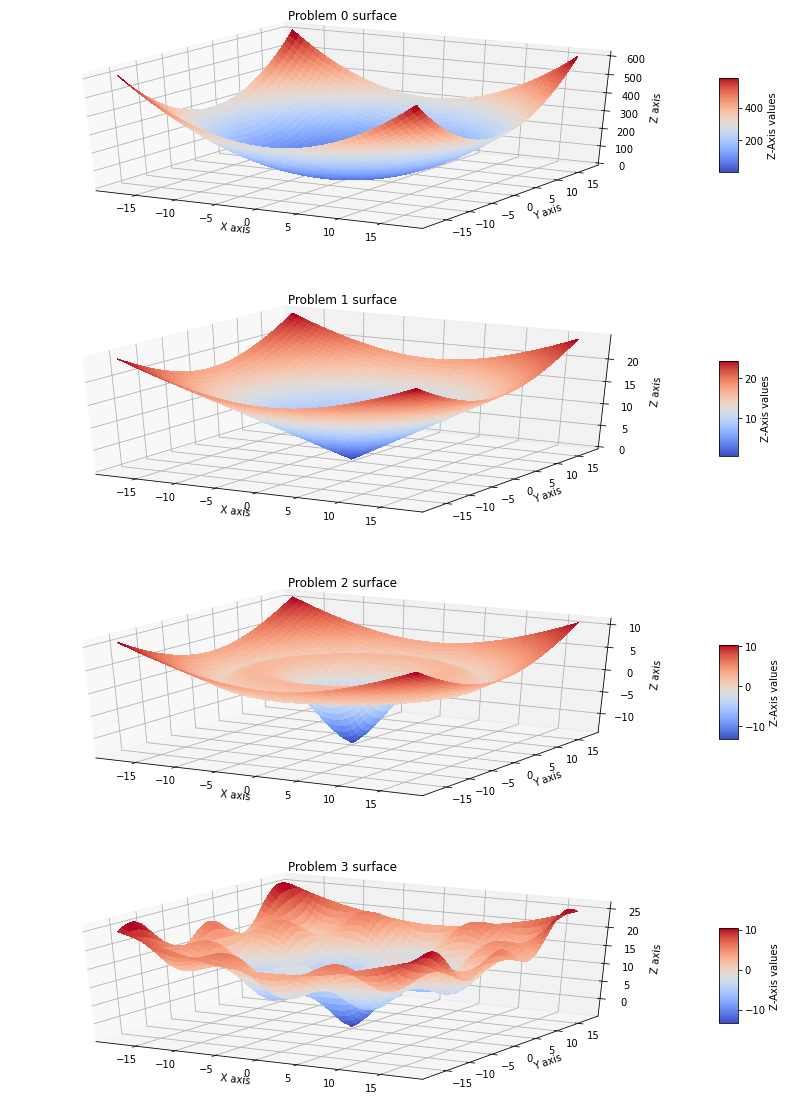

In [4]:
# Plot some nice plots for everyone to see
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np

# how many steps and at what resolution do I want to plot
steps = 350
x = 0.1*np.arange(-steps/2, steps/2)#返回一个有起点和终点的list 步长为1
y = 0.1*np.arange(-steps/2, steps/2)
X, Y = np.meshgrid(x, y)#生成坐标矩阵

# defining the figure parameters
fig = plt.figure(figsize=(15,20))#制定figure的宽和高

# first subplot of four
ax1 = fig.add_subplot(411, projection='3d')#411 4行数 1列数 1子图的索引
surf1 = ax1.plot_surface(X, Y, toy_problem_0(x, y),
                       cmap=cm.coolwarm,#颜色映射
                       linewidth=0,     # 线宽
                       antialiased=False)
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_zlabel('Z axis')
ax1.set_title('Problem 0 surface')
fig.colorbar(surf1, shrink=0.4, aspect=5, label='Z-Axis values')

# second subplot of four
ax2 = fig.add_subplot(412, projection='3d')
surf2 = ax2.plot_surface(X, Y, toy_problem_1(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf2,  shrink=0.4, aspect=5, label='Z-Axis values')
ax2.set_xlabel('X axis')
ax2.set_ylabel('Y axis')
ax2.set_zlabel('Z axis')
ax2.set_title('Problem 1 surface')

# third subplot of four
ax3 = fig.add_subplot(413, projection='3d')
surf3 = ax3.plot_surface(X, Y, toy_problem_2(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax3.set_xlabel('X axis')
ax3.set_ylabel('Y axis')
ax3.set_zlabel('Z axis')
ax3.set_title('Problem 2 surface')

# fourth subplot of four
ax4 = fig.add_subplot(414, projection='3d')
surf4 = ax4.plot_surface(X, Y, toy_problem_3(x, y),
                       cmap=cm.coolwarm,
                       linewidth=0,
                       antialiased=False)
fig.colorbar(surf3, shrink=0.4, aspect=5, label='Z-Axis values')
ax4.set_xlabel('X axis')
ax4.set_ylabel('Y axis')
ax4.set_zlabel('Z axis')
ax4.set_title('Problem 3 surface')

# and show plots
plt.show()

<h2> Task 1, Random Search: </h2>
<ul>
    *In Task 1, you are to implement a random search method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(13,17).*  <br/>
    Task 1 holds 33 (+3) points overall. <br/>
    
<li> **T1Q1, 10 Points**: Explain in CONCISELY. <br/>
    <ul>
    <li> How does a random search work? <br/> </li>
    <li> How would you go about implementing a random search in code? <br/> </li>
    <li> In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using random search?) <br/> </li> </ul>
    </li>
<li>**T1Q2, 10 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T1Q3, 13 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why? </li>
<li>**BONUS, up to 3 Points**: Plot useful, insight generating figures. </li>
</ul>

<h3> T1Q1 </h3>

*Initialize x with a random position in the search place, then sample a new position x' in the search place, compare the value of f(x) and f(x'), if f(x')>f(x), set x = x'. And put these in a loop and iterate, set the iteration times.*

*First I will define a function with four parameters,these are iteration times, initial positions and target function. In the function I will set a while circulation, compare the initial position in the target function's result with random positions. If the result is smaller than the initial position, then set this position's value as the now_value, and continue to comparing, untile we find the minimum value. The return value of the function is a list which contain three lists, and more detailed explanation are written in the comments.*

*The issue is random search may require more iterations to find the minimum, it is completely random. The benefit is the efficiency is better than computing all the values and comparing them one by one*

<h3> T1Q2 </h3>

In [5]:
import random

def Random_search(iter_nums,initia_x,initia_y,function):
    
    random_pos_x = []     # store random numbers
    random_pos_y = []
    random_pos = []
    
    best_pos_x = []       # store positions
    best_pos_y = []
    best_pos = []
    
    value = []
    
    iter_nums_count = 0 # iteration times
    
    start_pos = -17 # random number range
    end_pos = 17

    target_value = function(initia_x,initia_y)# initial function value
    value.append(target_value)
    
    while iter_nums_count <= iter_nums:
        
        x_random = random.randint(start_pos,end_pos)
        y_random = random.randint(start_pos,end_pos)# generating random numbers
        
        random_pos_x.append(x_random)# add random value to the list
        random_pos_y.append(y_random)
        random_pos.append([x_random,y_random])
        
        now_value = function(x_random,y_random)
        
        if now_value < target_value: # compare values
            
            best_pos_x.append(x_random)
            best_pos_y.append(y_random)
            best_pos.append([x_random,y_random])
            
            target_value = now_value
            
            value.append(now_value)
        
        iter_nums_count = iter_nums_count + 1
    
    plt.plot(random_pos_x,random_pos_y,'ob',label='Random numbers')# bonus plot positions figure
    plt.plot(best_pos_x,best_pos_y,'*r',label='Good positions')
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.grid()
    plt.legend()
    plt.show()
    
    return [best_pos[-1],random_pos,best_pos,value]
    

<h3> T1Q3 </h3>

--------------------------------------------------------------------------------------------------------------
toy_problem_0


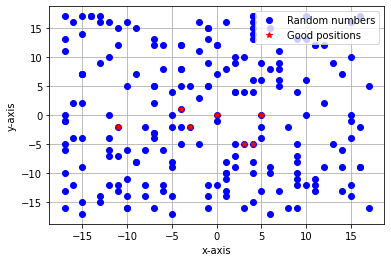

Best x is: 0  Best y is: 0
Target position list: [[-11, -2], [4, -5], [3, -5], [5, 0], [-4, 1], [-3, -2], [0, 0]]
Target value list: [458, 125, 41, 34, 25, 17, 13, 0]
--------------------------------------------------------------------------------------------------------------
toy_problem_1


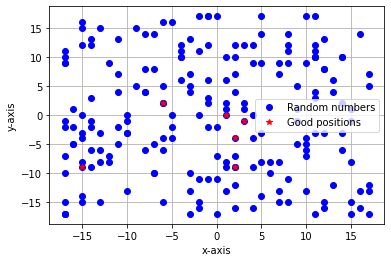

Best x is: 1  Best y is: 0
Target position list: [[-15, -9], [2, -9], [-6, 2], [2, -4], [3, -1], [1, 0]]
Target value list: [21.400934559032695, 17.4928556845359, 9.219544457292887, 6.324555320336759, 4.47213595499958, 3.1622776601683795, 1.0]
--------------------------------------------------------------------------------------------------------------
toy_problem_2


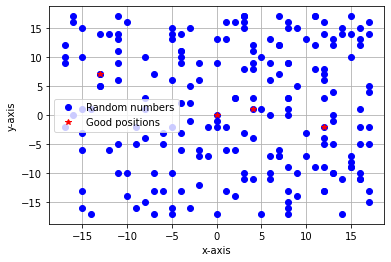

Best x is: 0  Best y is: 0
Target position list: [[12, -2], [-13, 7], [4, 1], [0, 0]]
Target value list: [7.438300543078059, 1.6521874043322131, 0.802189044278764, -5.90053997784421, -13.962634015954636]
--------------------------------------------------------------------------------------------------------------
toy_problem_3


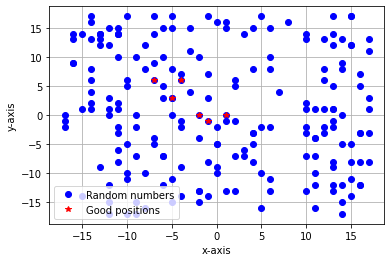

Best x is: 1  Best y is: 0
Target position list: [[-4, 6], [-5, 3], [-7, 6], [-2, 0], [-1, -1], [1, 0]]
Target value list: [23.82940583587759, 6.211420911114378, 6.028441869213611, 4.819733307282862, -0.7627109700918422, -2.0978605484243484, -3.0019871215674527]
--------------------------------------------------------------------------------------------------------------


In [6]:
initia_x = 13
initia_y = 17
iter_nums = 200

def print_divider():
    print("--------------------------------------------------------------------------------------------------------------")

print_divider()
print("toy_problem_0")
target_value = Random_search(iter_nums,initia_x,initia_y,toy_problem_0)
print('Best x is:',target_value[0][0],' Best y is:',target_value[0][1])
print('Target position list:',target_value[2])
print('Target value list:',target_value[3])
print_divider()
print("toy_problem_1")
target_value = Random_search(iter_nums,initia_x,initia_y,toy_problem_1)
print('Best x is:',target_value[0][0],' Best y is:',target_value[0][1])
print('Target position list:',target_value[2])
print('Target value list:',target_value[3])
print_divider()
print("toy_problem_2")
target_value = Random_search(iter_nums,initia_x,initia_y,toy_problem_2)
print('Best x is:',target_value[0][0],' Best y is:',target_value[0][1])
print('Target position list:',target_value[2])
print('Target value list:',target_value[3])
print_divider()
print("toy_problem_3")
target_value = Random_search(iter_nums,initia_x,initia_y,toy_problem_3)
print('Best x is:',target_value[0][0],' Best y is:',target_value[0][1])
print('Target position list:',target_value[2])
print('Target value list:',target_value[3])
print_divider()

*I think 200 iteration times can find the minimun, but 200 iteration times can't guarantee to find the minimum, 
because it is completely random.*

<h2> Task 2, Gradient Descend: </h2>
<ul>
    *In Task 2, you are to implement a gradient descend (or steepest descend) method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(13,17). * <br/>
    Task 2 holds 33 (+3) points overall. <br/>
    
<li>**T2Q1, 10 Points**: Explain in words, concisely. <br/>
    <ul><li> How does a gradient based / first-order search work? <br/> </li>
    <li> How would you go about implementing gradient descend (or steepest descend) search in code? <br/> </li>
    <li> In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using gradient decent? <br/> </li> </ul> </li>

<li>**T2Q2, 10 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T2Q3, 13 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why? </li>
<li>**BONUS, up to 3 Points**: Plot useful, insight generating figures. </li>
</ul>

<h3> TIPs: </h3>
<ul>
    It might be useful to read up on gradient approximation, or refresh the relevant lin.alg or just have a good memory and still know :-) 
     </ul> 

<h3> T2Q1 </h3>

*Because the gradient has a direction, gradient descend just like go down a mountain, set a initialization point and step size, the position will go down in the direction of the gradient, untile we found the minimum or the gradient is smooth enough.*

*In the code, I will use iteration to the gradient descent, the judging condition is gradient is bigger than a value which is very small and the iteration-counters is less than the iteration times, and the current position will minus the step size multiply gradient in each loop. Set an array to store the gradient of x and y, updating them in the loop. And set another array to store the position and plot them on the figure. *

*The benefits is gradient descend can decrease the iteration times compare with random search, because it has a specific direction, not randomly. The issue is sometimes gradient descend method can not find the global minimum, the result may a local minimum.*

<h3> T2Q2 </h3>

In [189]:
import numpy as np
import pandas

def gradient_decend(x,y,alpha,iter_nums,function_name):
    
    iter_nums_count = 1
      
    theta = np.array([x,y]) #store the current position
    theta_array = np.zeros([iter_nums,2])#store the position
    
    list_theta = []
    list_theta.append(theta.tolist())# used for interval sampling
    
    theta_array[0] = theta
    theta_gradient = np.array([0.0,0.0])#gradient
    
    value_list = [] #store the function's value
    itera_list = []
    itera_list.append(iter_nums_count)
    
    w1 = 0.45
    w2 = 0.5
    name = list(function_name)#judging which toy problem
    
    if name[-1] == '0':
        theta_gradient = 2*theta
        value_list.append(theta[0]**2 + theta[1]**2)
        flag = 0
        
    elif name[-1] == '1':     
        theta_gradient[0] = theta[0]/(np.sqrt(theta[0]**2 + theta[1]**2))#calculating gradient
        theta_gradient[1] = theta[1]/(np.sqrt(theta[0]**2 + theta[1]**2))
        value_list.append(np.sqrt(theta[0]**2 + theta[1]**2))
        flag = 1
        
    elif name[-1] == '2':
        flag = 2
        p = np.sqrt(theta[0]**2 + theta[1]**2)
        q = w1*w2*p
        if theta[0]**2 + theta[1]**2 > 196: #case1
            theta_gradient[0] = theta[0]/p
            theta_gradient[1] = theta[1]/p
            value_list.append(np.sqrt(theta[0]**2 + theta[1]**2)-np.pi/(w1*w2))
        else:                              #case2
            theta_gradient[0] = (np.pi*np.sin(q)+np.cos(q))*(theta[0]/p)-w1*w2*theta[0]*np.sin(q)
            theta_gradient[1] = (np.pi*np.sin(q)+np.cos(q))*(theta[1]/p)-w1*w2*theta[1]*np.sin(q)
            value_list.append((np.sqrt(theta[0]**2 + theta[1]**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(theta[0]**2 + theta[1]**2)))
                   
    elif name[-1] == '3':
        p = np.sqrt(theta[0]**2 + theta[1]**2)
        flag = 3
        theta_gradient[0] = theta[0]/p + (np.sin(w1*theta[0])*np.cos(w2*theta[1]))/w2
        theta_gradient[1] = theta[1]/p + (np.cos(w1*theta[0])*np.sin(w2*theta[1]))/w1
        value_list.append(np.sqrt(theta[0]**2 + theta[1]**2) - 1/(w1*w2)*np.cos(w1*theta[0])*np.cos(w2*theta[1]))
    else:
        print('Please input correct function name')
        return
        
      
    while (iter_nums_count < iter_nums) : 
        
        
        theta = theta - alpha*theta_gradient # gradient descend
        theta_array[iter_nums_count] = theta #put x,y in the right position
        list_theta.append(theta.tolist())
                    
        iter_nums_count = iter_nums_count + 1
        itera_list.append(iter_nums_count)
        
        #alpha = alpha/(2*iter_nums_count)
              
        if flag == 0:
            theta_gradient = 2*theta
            value_list.append(theta[0]**2 + theta[1]**2)
        elif flag == 1:   
            theta_gradient[0] = theta[0]/np.sqrt(theta[0]**2 + theta[1]**2)#updating gradient
            theta_gradient[1] = theta[1]/np.sqrt(theta[0]**2 + theta[1]**2)
            value_list.append(np.sqrt(theta[0]**2 + theta[1]**2))
        elif flag == 2:
            p = np.sqrt(theta[0]**2 + theta[1]**2)
            q = w1*w2*p
            if theta[0]**2 + theta[1]**2 > 196:
                theta_gradient[0] = theta[0]/p
                theta_gradient[1] = theta[1]/p
                value_list.append(np.sqrt(theta[0]**2 + theta[1]**2)-np.pi/(w1*w2))
            else:
                theta_gradient[0] = (np.pi*np.sin(q)+np.cos(q))*(theta[0]/p)-w1*w2*theta[0]*np.sin(q)
                theta_gradient[1] = (np.pi*np.sin(q)+np.cos(q))*(theta[1]/p)-w1*w2*theta[1]*np.sin(q)
                value_list.append((np.sqrt(theta[0]**2 + theta[1]**2)-np.pi/(w1*w2))*np.cos(w1*w2*np.sqrt(theta[0]**2 + theta[1]**2)))
        elif flag == 3:
            p = np.sqrt(theta[0]**2 + theta[1]**2)
            theta_gradient[0] = theta[0]/p + (np.sin(w1*theta[0])*np.cos(w2*theta[1]))/w2
            theta_gradient[1] = theta[1]/p + (np.cos(w1*theta[0])*np.sin(w2*theta[1]))/w1
            value_list.append(np.sqrt(theta[0]**2 + theta[1]**2) - 1/(w1*w2)*np.cos(w1*theta[0])*np.cos(w2*theta[1]))
    
    real_array = theta_array[0:iter_nums_count,:]#slicing useless parts
    
    
    fig = plt.figure(figsize=(15, 7)) 
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax1.set_title('Position')         
    ax1.set_xlabel('x-axis')                    
    ax1.set_ylabel('y-axis') 
    ax2.set_title('Values')         
    ax2.set_xlabel('iteration times')                    
    ax2.set_ylabel('value') 
    plot1 = ax1.scatter(real_array[:,0],real_array[:,1])
    plot2 = ax2.plot(itera_list,value_list)
    ax1.grid()
    ax2.grid()
    plt.show()
    #plot2.show()
    
    show_list = []
    for i in range(iter_nums_count):
        if i % 20 ==0:
            show_list.append(list_theta[i])
        
    
    return [theta,show_list,value_list[-1]]  
   

<h3> T2Q3 </h3>

--------------------------------------------------------------------------------------------------------------
toy_problem_0


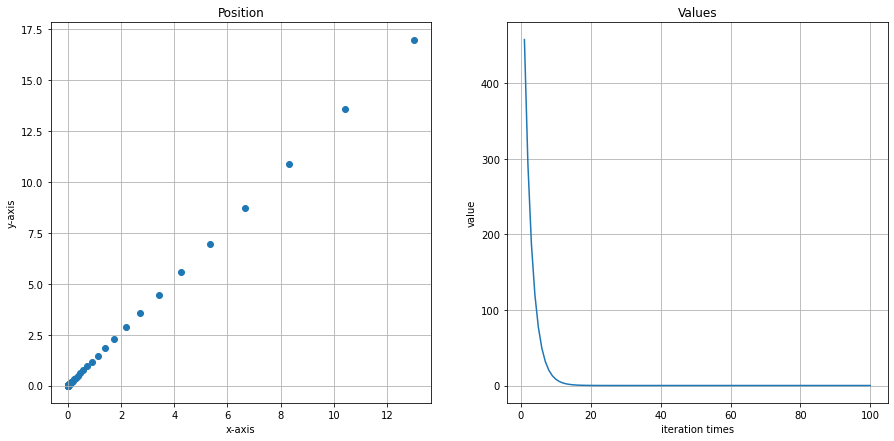

The minimum point is: [3.31018346e-09 4.32870145e-09]
The minimum value is: 2.9694970789804587e-17
The gradient decent processing is: [[13.0, 17.0], [0.1498797955988901, 0.19599665578316397], [0.001727996394520391, 0.002259687592834357], [1.992244203125655e-05, 2.6052424194720102e-05], [2.2969011842118998e-07, 3.0036400101232516e-07]]
--------------------------------------------------------------------------------------------------------------
toy_problem_1


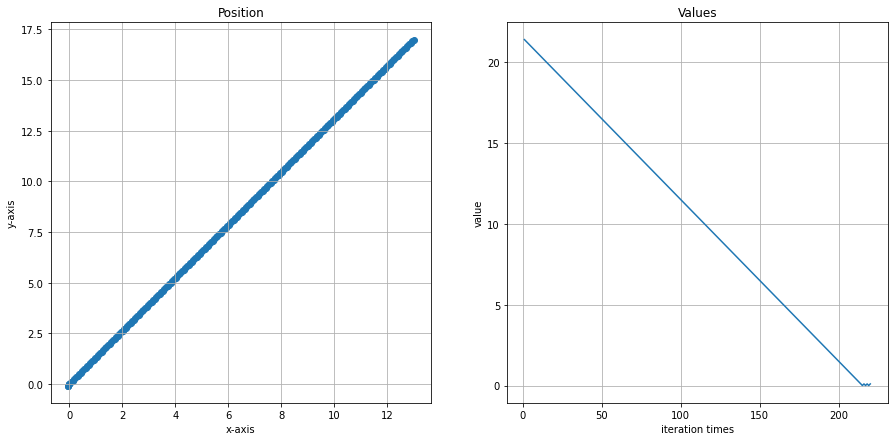

The minimum point is: [-0.06017731 -0.07869341]
The minimum value is: 0.09906544096732006
The gradient decent processing is: [[13.0, 17.0], [11.78509978485841, 15.411284334045618], [10.57019956971682, 13.822568668091215], [9.35529935457523, 12.233853002136811], [8.14039913943364, 10.645137336182408], [6.925498924292048, 9.056421670228005], [5.710598709150441, 7.467706004273608], [4.495698494008845, 5.878990338319222], [3.2807982788672474, 4.290274672364837], [2.0658980637256485, 2.7015590064104513], [0.85099784858405, 1.1128433404560623]]
--------------------------------------------------------------------------------------------------------------
toy_problem_2


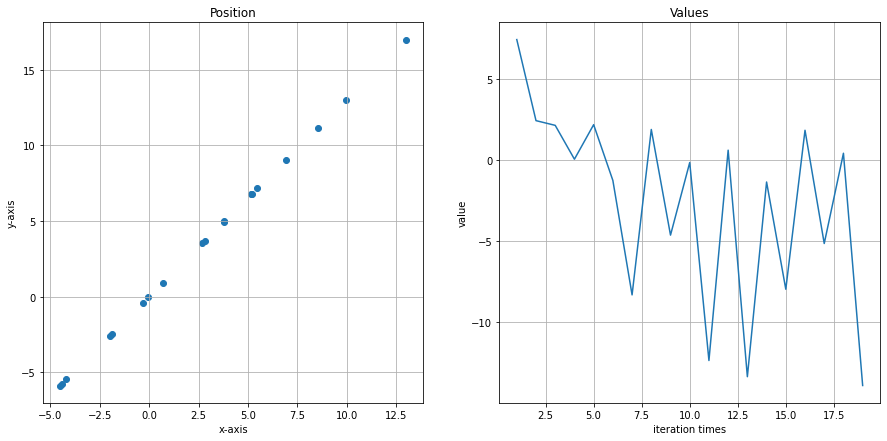

The minimum value is: [-0.03876954 -0.05069862]
The minimum value is: -13.897377545667105
The gradient decent processing is: [[13.0, 17.0]]
--------------------------------------------------------------------------------------------------------------
toy_problem_3


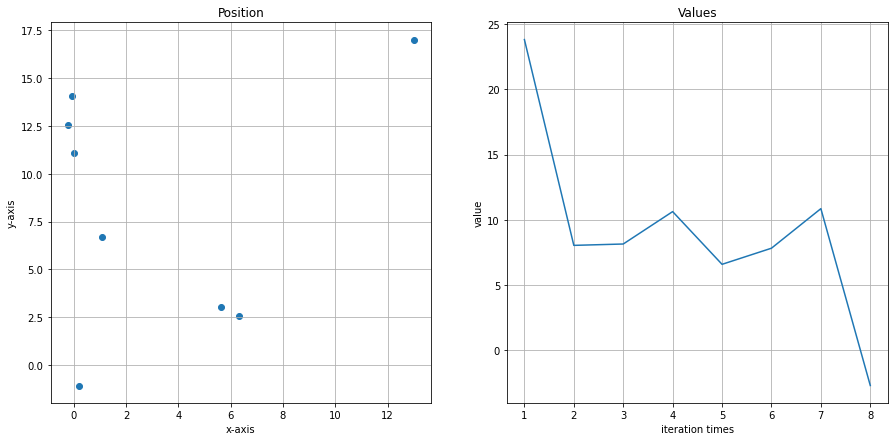

The minimum position is: [ 0.19685077 -1.06022889]
The minimum value is: -2.7410579722093216
The gradient decent processing is: [[13.0, 17.0]]
--------------------------------------------------------------------------------------------------------------


In [197]:
print_divider()
print("toy_problem_0")
result = gradient_decend(13.0,17.0,0.1,100,'toy_problem_0')
print('The minimum point is:',result[0])
print('The minimum value is:',result[2])
print('The gradient decent processing is:',result[1])
print_divider()
print("toy_problem_1")
result = gradient_decend(13.0,17.0,0.1,220,'toy_problem_1')
print('The minimum point is:',result[0])
print('The minimum value is:',result[2])
print('The gradient decent processing is:',result[1])
print_divider()
print("toy_problem_2")
result = gradient_decend(13.0,17.0,5,19,'toy_problem_2')
print('The minimum value is:',result[0])
print('The minimum value is:',result[2])
print('The gradient decent processing is:',result[1])
print_divider()
print("toy_problem_3")
result = gradient_decend(13.0,17.0,6,8,'toy_problem_3')
print('The minimum position is:',result[0])
print('The minimum value is:',result[2])
print('The gradient decent processing is:',result[1])
print_divider()

#The question is below the figure

*I think gradient descend method can find all the minimum in 4 toy_problem, but it can't find the global minimum in problem_2 and problem 3. At first, in problem_2 the result is a stationary point, because the gradient near the stationary point is very small, and in problem_3, the result is a local minimum. Combined with the figure in task0, I found toy_problem is a multimodal function, so the gradient descend trapped in the local minimu. Then I try some different step size and iteration times, find a appropriate step size which can stride the local minimum.

*The interval of each point in the scatter plot represents the gradient descent velocity. The line graph represents the change in z value*

### <h2> Task 3, Method 3 </h2>
<ul>
    *In Task 3, you are to implement Newton-Raphson method as an optimizer, and then test it on the toy problems from Task 0. The initialization point for the method is to be set to (x,y)=(13,17). * <br/>
    Task 3 holds 33 (+7) points overall. <br/>
<li>**T3Q1, 10 Points**: Explain in words, concisely. <br/>
    <ul><li> How does Newton-Raphson search work? <br/> </li>
    <li> How would you go about implementing Newton-Raphson search in code? <br/> </li>
    <li> In context of the 4 toy-problems from Task0, what issues and what benefits do you expect when using Newton-Raphson? <br/> </li> </ul> </li>
<li>**T3Q2, 10 Points**: Implement this method as a python function so that it is compatible with the supplied toy-problems from Task0! </li>
<li>**T3Q3, 13 Points**: Test the function on the toy-problems, take a critical look at how the function performs at finding the minimum at (0,0) for all four problems. How does that differ from what you expected and why? </li>
<li>**BONUS, up to 3 Points**: Plot useful, insight generating figures. </li>
   </ul> 
   
<h3> TIPs: </h3>
<ul>
    <li> It is very likely that you'll have to somewhat creatively re-use the derivation method you chose to use in Task2 <br/> </li>
    <li> If you happen to have to need to invert some type of matrix, I'd prefer numpy.linalg.pinv OVER numpy.linalg.inv or other more stable solutions. <br/> </li>
    <li> Depending on implementation, this method might be sensitive to hyperparameters and exhibit somewhat erratic behavior, use your plots and other analysis tools for tuning and analysis :-) <br/> </li>
     </ul> 

<h3>T3Q1</h3>

*When the first derivation function equal to zero, the solution of the function is the extreme value of the primitive function. In order to find the solution, take a initial point on the derivative function, make a tangent through the point and cross the axis, then make a perpendicular on the point which on the axis, and the perpendicular will cross the curve, the make a tangent through the cross point again. Iterate this process, we will find the solution. In order to express the processing, do the Taylor expansion at the initial point, then we can get the expression Xn+1 = Xn - H*gradientXn *

*Define a two dimensional array to be used as the Hessian matrix, which used to store the second derivation of the function, set a one dimensional array to store the gradient of x and y. Then set a iteration times, when the gradient less than a very small value, break the iteration.*

*Newton-Raphson methon is a efficiency algorithm, it only need few iteration times, and it can also avoid the local minimum, find the global minimum. But the issue is sometimes calculating the inverse of hessian matrix requires a lot of compution.*

<h3>T3Q2</h3>

In [169]:
# placeholder to your answer to T3Q2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

   
def gradient_x(x,y,delta_0,func_name):
    return (func_name(x+delta_0,y)-func_name(x-delta_0,y))/(2*delta_0)

def gradient_y(x,y,delta_0,func_name):
    return (func_name(x,y+delta_0)-func_name(x,y-delta_0))/(2*delta_0)
 

def u_xx(x,y,delta_1,func_name):
    return (2*func_name(x,y)-func_name(x-delta_1,y)-func_name(x+delta_1,y))/(delta_1**2)

def u_xy(x,y,delta_1,delta_2,func_name):
    return (func_name(x+delta_1,y+delta_2)-func_name(x-delta_1,y+delta_2)-func_name(x+delta_1,y-delta_2)+func_name(x-delta_1,y-delta_2))/(4*delta_1*delta_2)

def u_yy(x,y,delta_2,func_name):
    return (2*func_name(x,y)-func_name(x,y-delta_2)-func_name(x,y+delta_2))/(delta_2**2)

def u_yx(x,y,delta_1,delta_2,func_name):
    return (func_name(x+delta_1,y+delta_2)-func_name(x-delta_1,y+delta_2)-func_name(x+delta_1,y-delta_2)+func_name(x-delta_1,y-delta_2))/(4*delta_1*delta_2)

def H_0(x,y):
    return np.array([[2, 0],
                      [0, 2]])

def H_1(x,y):
    return np.array([[u_xx(x,y,1e-5,toy_problem_1),u_xy(x,y,1e-5,1e-9,toy_problem_1)],
                     [u_yx(x,y,1e-5,1e-9,toy_problem_1),u_yy(x,y,1e-9,toy_problem_1)]])
    
def H_2(x,y):
    return np.array([[u_xx(x,y,1e-6,toy_problem_2),u_xy(x,y,1e-6,1e-9,toy_problem_2)],
                     [u_yx(x,y,1e-6,1e-9,toy_problem_2),u_yy(x,y,1e-9,toy_problem_2)]])
    
def H_3(x,y):
    return np.array([[u_xx(x,y,1e-5,toy_problem_3),u_xy(x,y,1e-5,1e-9,toy_problem_3)],
                     [u_yx(x,y,1e-5,1e-9,toy_problem_3),u_yy(x,y,1e-9,toy_problem_3)]])
    
def grade_0(x,y):
    return np.array([[2 * x],[2 * y]])
    
def grade_1(x,y):
    return np.array([[gradient_x(x,y,1e-5,toy_problem_1)],[gradient_y(x,y,1e-5,toy_problem_1)]])
    
def grade_2(x,y):
    return np.array([[gradient_x(x,y,1e-9,toy_problem_2)],[gradient_y(x,y,1e-9,toy_problem_2)]])
    
def grade_3(x,y):
    return np.array([[gradient_x(x,y,1e-9,toy_problem_3)],[gradient_y(x,y,1e-9,toy_problem_3)]])
    
def delta_newton(x,y,func_number):
    
    alpha = 1
    
    if func_number == 0:
        delta = alpha * np.dot(np.linalg.pinv(H_0(x,y)),grade_0(x,y))
        
    elif func_number == 1:
        delta = alpha * np.dot(np.linalg.pinv(H_1(x,y)),grade_1(x,y))
            
    elif func_number == 2:
        delta = alpha * np.dot(np.linalg.pinv(H_2(x,y)),grade_2(x,y))
            
    elif func_number == 3:
        delta = alpha * np.dot(np.linalg.pinv(H_3(x,y)),grade_3(x,y))
               
    return delta
        
            
def newton(init_x,init_y,iter_nums,func_number):
    position = np.matrix([[init_x],
                       [init_y]])
    x_p = [position[0,0]]
    y_p = [position[1,0]]
    
    iter_list = []
    value_list = []
    
    iter_num_counter = 0
    m = 1e-10
    
    for i in range(iter_nums):
        
        if func_number == 0:
            value_list.append(toy_problem_0(position[0,0],position[1,0]))
        elif func_number == 1:
            value_list.append(toy_problem_1(position[0,0],position[1,0]))
        elif func_number == 2:
            value_list.append(toy_problem_2(position[0,0],position[1,0]))
        elif func_number == 3:
            value_list.append(toy_problem_3(position[0,0],position[1,0]))
        
        iter_num_counter = iter_num_counter + 1
        iter_list.append(iter_num_counter)
        
        try:
            delta = delta_newton(position[0,0],position[1,0],func_number)
        except:
            break
               
        if abs(delta[0,0])<m and abs(delta[1,0])<m:
            break
                   
        position = position - delta
        
        x_p.append(position[0,0])
        y_p.append(position[1,0])
        
    fig = plt.figure(figsize=(15, 7)) 
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_title('Values')         
    ax1.set_xlabel('iteration times')                    
    ax1.set_ylabel('value') 
    plot2 = ax1.plot(iter_list,value_list)
    ax1.grid()
    plt.show()
    
    return [x_p,y_p,value_list,iter_num_counter]


<h3>T3Q3</h3>

--------------------------------------------------------------------------------------------------------------
toy_problem_0


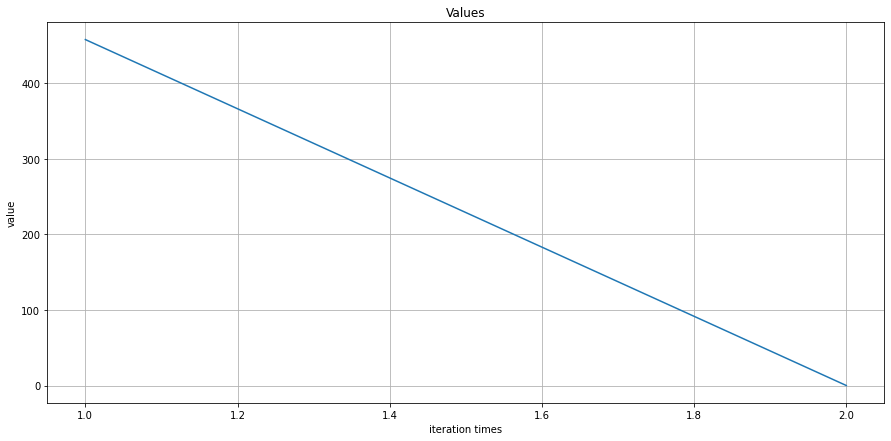

The best position is [ 0.0 , 0.0 ]
The minimum value is 0.0
The iteration times is 2
--------------------------------------------------------------------------------------------------------------
toy_problem_0


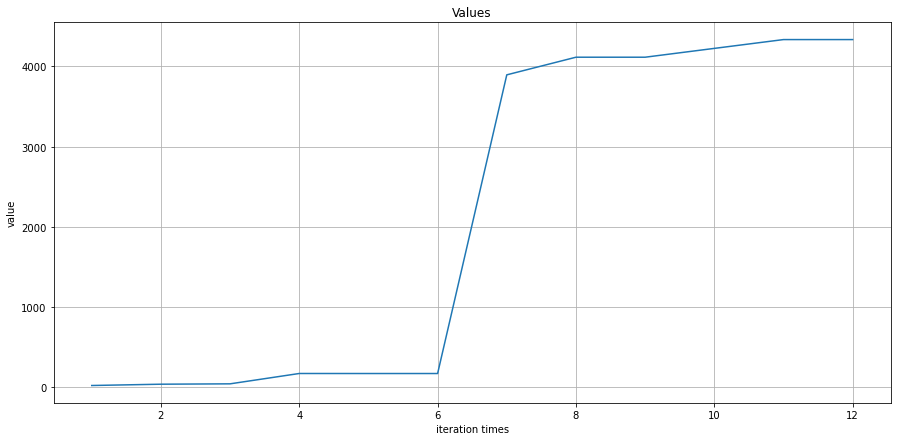

The best position is [ 4335.140983110728 , 20.686141753737978 ]
The minimum value is 4335.190337217837
The iteration times is 12
--------------------------------------------------------------------------------------------------------------
toy_problem_0


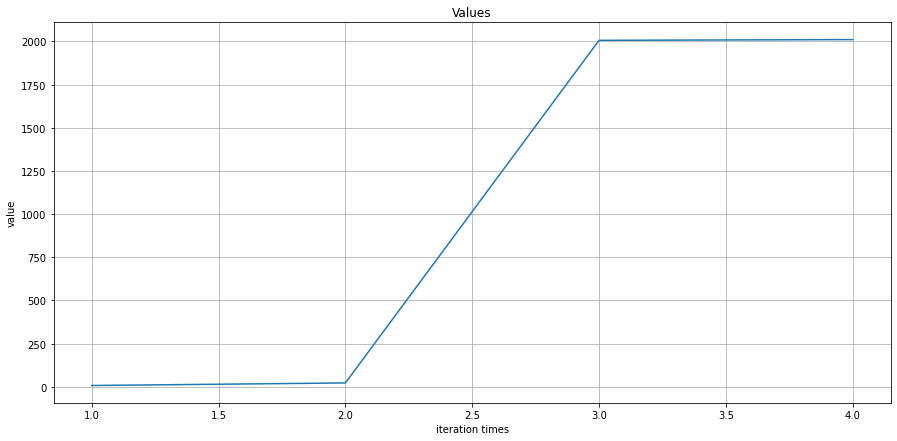

The best position is [ 2024.6998740000004 , 16.5030815915 ]
The minimum value is 2010.8044961690534
The iteration times is 4
--------------------------------------------------------------------------------------------------------------
toy_problem_0


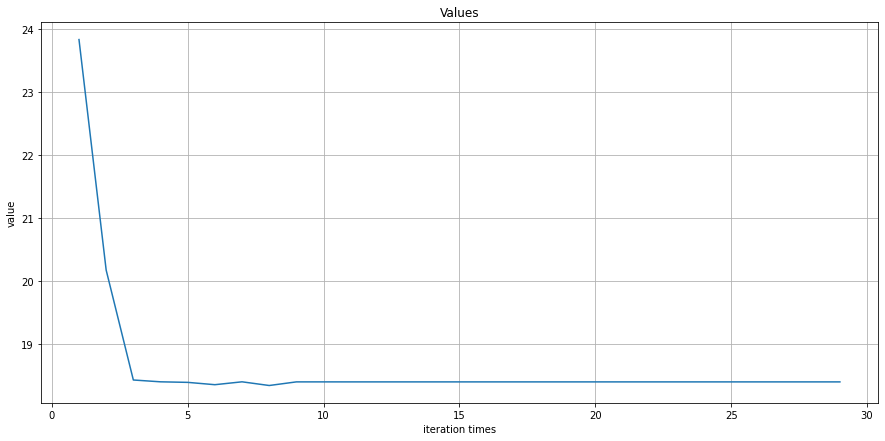

The best position is [ 9.563475879363086 , 15.11673793655394 ]
The minimum value is 18.402584855171547
The iteration times is 29


In [179]:
print_divider()
print("toy_problem_0")
result = newton(13,17,100,0)
print("The best position is [",result[0][-1],",",result[1][-1],"]")
print("The minimum value is",result[2][-1])
print("The iteration times is",result[3])
print_divider()
print("toy_problem_0")
result = newton(13,17,100,1)
print("The best position is [",result[0][-1],",",result[1][-1],"]")
print("The minimum value is",result[2][-1])
print("The iteration times is",result[3])
print_divider()
print("toy_problem_0")
result = newton(13,17,100,2)
print("The best position is [",result[0][-1],",",result[1][-1],"]")
print("The minimum value is",result[2][-1])
print("The iteration times is",result[3])
print_divider()
print("toy_problem_0")
result = newton(13,17,100,3)
print("The best position is [",result[0][-1],",",result[1][-1],"]")
print("The minimum value is",result[2][-1])
print("The iteration times is",result[3])

*Use conventional method to calculate hessian matrix will lead to the singular matrix, so I use numerical method to get the second derivation. And newton method is so sensitive to the delta, I expected it will converge very quickly, but it is very hard to converge. I tried a lot of different parameters, it only work in problem_3, I couldn't find appropriate delta which can converge problem_1 and problem_2. But we can get the advantages from problem_0, it only need two iterations to find the minimum value.*